In [1]:
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library("RColorBrewer")
library(ggplot2)
library(dplyr)
library(purrr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell", "CD16+ monocyte", "Dendritic cell",
              "Plasmacytoid dendritic cell")
coi <- c("Cytotoxic T cell", "Dendritic cell", "Plasmacytoid dendritic cell" ) # cell types of interest
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet", "ItClust")

colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

In [3]:
umapdata <- read.csv("../Results/Files/umap_data.csv")
expressiondata_file="../Data/Fulldata/PBMC_Query/data.csv"
bootstrap_weighted <- read.csv("../Results/Files/summary_mosaic.csv")

rownames(umapdata) <- umapdata$id

In [4]:
umapdata[is.na(umapdata)] <- 0

In [5]:
dif <- do.call(cbind, lapply(methods, function(method) umapdata[, paste(sep="_", "mosaic", method)] - umapdata[, paste(sep="_", "mono", method)]))
colnames(dif) <- paste(sep="_", "difference", methods)
umapdata <- cbind(umapdata, dif)
head(umapdata)

,id,mosaic_CellID,mosaic_ItClust,mosaic_Seurat,mosaic_SingleCellNet,mosaic_SingleR,mono_CellID,mono_ItClust,mono_Seurat,mono_SingleCellNet,⋯,fullPred_CellID,fullPred_Seurat,fullPred_SingleCellNet,fullPred_SingleR,fullPred_ItClust,difference_Seurat,difference_SingleR,difference_CellID,difference_SingleCellNet,difference_ItClust
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pbmc2_10X_V2_AAACCTGAGATGGGTC,pbmc2_10X_V2_AAACCTGAGATGGGTC,0.3333333,1.00,1.0000000,1.0000000,1.0000000,0.3387097,1.00,1.0000000,1.0000000,⋯,Megakaryocyte,B cell,B cell,B cell,CD14+ monocyte,0.0000000,0.0000000,-0.005376344,0.00000000,0.0
pbmc2_10X_V2_AAACCTGAGCGTAATA,pbmc2_10X_V2_AAACCTGAGCGTAATA,0.2857143,1.00,1.0000000,1.0000000,1.0000000,0.3387097,1.00,1.0000000,1.0000000,⋯,Megakaryocyte,B cell,B cell,B cell,CD14+ monocyte,0.0000000,0.0000000,-0.052995392,0.00000000,0.0
pbmc2_10X_V2_AAACCTGAGCTAGGCA,pbmc2_10X_V2_AAACCTGAGCTAGGCA,0.0000000,1.00,0.1904762,0.7460317,0.6825397,0.1129032,1.00,0.0000000,0.6666667,⋯,Dendritic cell,CD4+ T cell,Cytotoxic T cell,CD4+ T cell,CD14+ monocyte,0.1904762,0.5079365,-0.112903226,0.07936508,0.0
pbmc2_10X_V2_AAACCTGAGGGTCTCC,pbmc2_10X_V2_AAACCTGAGGGTCTCC,0.7301587,1.00,0.9682540,0.9841270,1.0000000,0.3548387,1.00,0.3650794,0.9841270,⋯,Dendritic cell,CD14+ monocyte,Dendritic cell,Dendritic cell,Plasmacytoid dendritic cell,0.6031746,0.0000000,0.375320020,0.00000000,0.0
pbmc2_10X_V2_AAACCTGGTCCGAACC,pbmc2_10X_V2_AAACCTGGTCCGAACC,0.2380952,0.45,0.7777778,0.6666667,1.0000000,0.3387097,0.05,0.6666667,1.0000000,⋯,Dendritic cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,Plasmacytoid dendritic cell,0.1111111,0.0000000,-0.100614439,-0.33333333,0.4
pbmc2_10X_V2_AAACCTGTCGTCCGTT,pbmc2_10X_V2_AAACCTGTCGTCCGTT,0.0000000,0.95,1.0000000,1.0000000,1.0000000,0.0483871,0.25,1.0000000,1.0000000,⋯,Megakaryocyte,CD4+ T cell,CD4+ T cell,CD4+ T cell,CD14+ monocyte,0.0000000,0.0000000,-0.048387097,0.00000000,0.7


In [6]:
umap <- prepare_umap(file = expressiondata_file, meta_data = umapdata, split = "tech")

Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 10910 column names but the data has 10911 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 500
[1] "...."
[1] "Scaling..."


Warning message:
“Argument 'center' should be of the same length as number of rows of 'x'. Use of a scalar value is deprecated: 1 != 500”


[1] "create seurat object...."
[1] "Set assay...."
[1] "PCA...."
[1] "Get UMAP..."


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

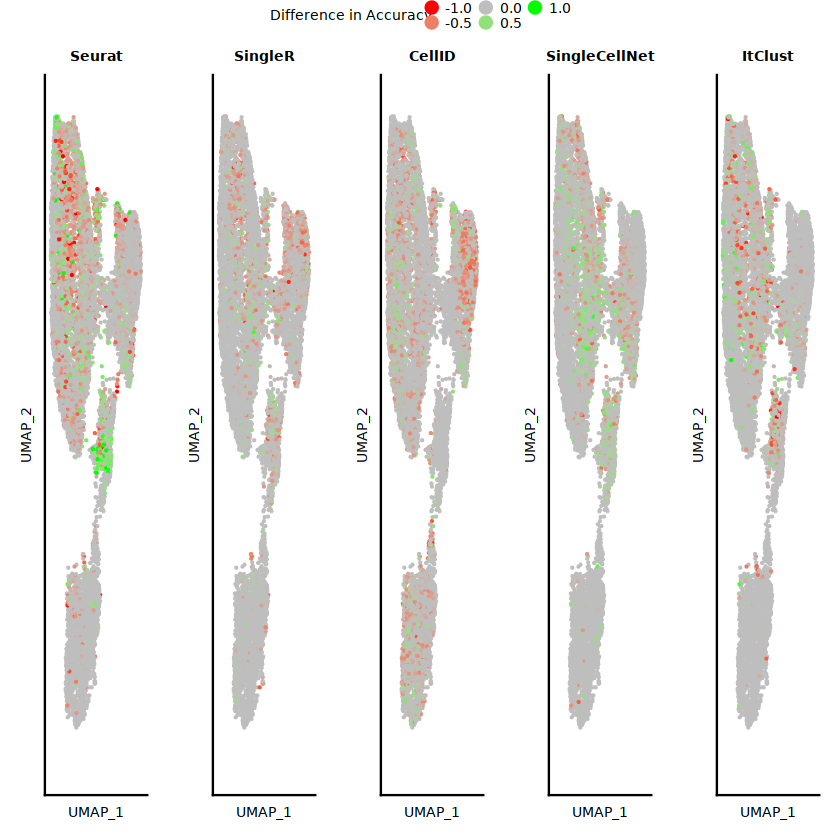

In [7]:
plots <- plot_difference(umap, c(paste(sep="_", "difference",methods)), NULL,
                     1,1, legend_ncol = 3) 
names(plots) <- methods

plots <- lapply(seq(1,length(methods),1) , function(n) plots[[n]] +
                labs(title= methods[n]))
                  
f3a <- ggpubr::ggarrange(plotlist = plots, font.label = list(size = 15),
                         common.legend = T, legend = "top", ncol=5, nrow=1)
f3a


In [8]:
plot_accuracy <- get_violin_plot(bootstrap_weighted, colors, celltypes,
                                 methods, "", "Accuracy", colors)
plot_precision <- get_violin_plot(bootstrap_weighted, colors, celltypes,
                                  methods,"", "Precision", colors)

plot_f1 <- get_violin_plot(bootstrap_weighted, colors, celltypes,
                                  methods,"", "F1", colors)

In [9]:
min(bootstrap_weighted$full_precision)

[1] 0

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”


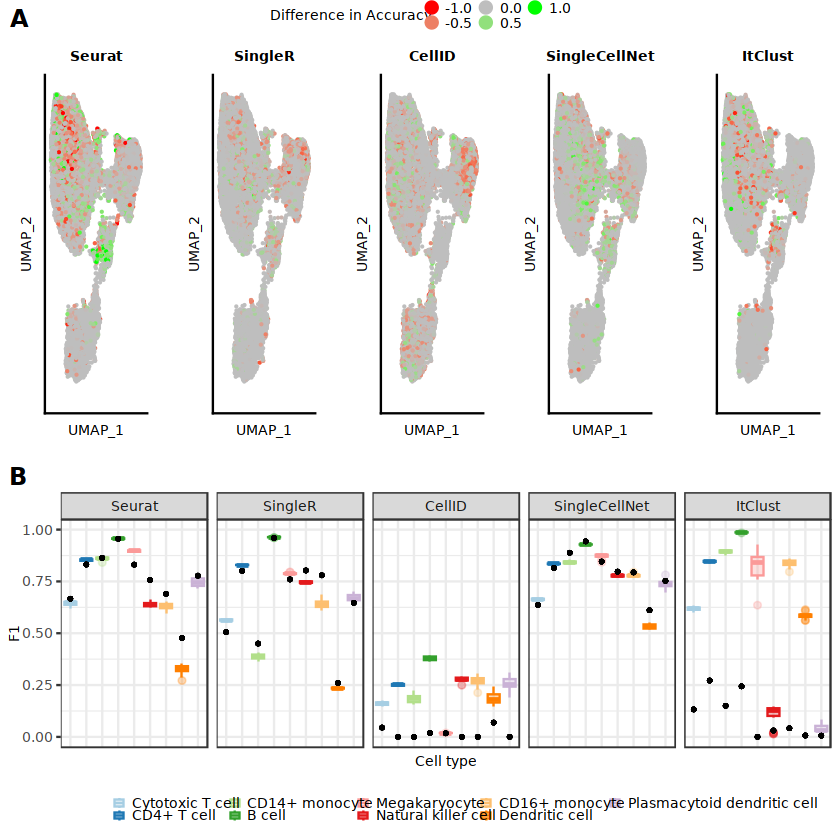

In [10]:


f3 <- ggpubr::ggarrange(f3a, plot_f1, nrow=2, ncol=1, labels= c("A","B"),
                        common.legend=F, heights=c(1.2, 1))
f3

In [12]:

ggsave(
  "../Results/Figures/F4_PBMC_mosaic.jpg",
  plot = f3,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 100,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)

In [13]:
s5 <- ggpubr::ggarrange(plot_accuracy,plot_precision, nrow=2, ncol=1,
                          labels= c("A", "B"),
                        common.legend=T, legend="bottom")

ggsave(
  "../Results/Figures/S5_PBMC_mosaic.jpg",
  plot = s5,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 80,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)